In [280]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from django.db import models
#from pygments.lexers import get_all_lexers
#from pygments.styles import get_all_styles 

In [281]:
sampleData = pd.read_csv('SimulatedInputdata -5Nov.csv')

In [282]:
#Change DateofForm into datetime format
sampleData.DateofForm = pd.to_datetime(sampleData.DateofForm)

# Column assumptions
  - user_id = patient ID
  - submission_date = Date the form was submitted
  - D18 = weight
### Mental Health
  - D20a = Depression
  - D20b = Anxiety
  - D20c = Enthusiasm
  - D20d = Mental Fatigue
### Saliva and swallowing
  - D21a  = Saliva
  - D21b = Food variety
  - D21c = Food texture
  - D21d = Amount of food consumed
  - D21e = Supplements
  - D21f = Ability to swallow
### Breathing
  - D22a = Overall Breathing
  - D22b = Shortness of breath 
  - D22c = Breathing while lying flat
### Appetite and digestive health
  - D23a = Appetite
  - D23b = Nausea
  - D23c = Bloating/Gas
  - D23d = Constipation
### Physical

  - D24	LEFT ARM
  - D24a	Twitching
  - D24b	Cramping
  - D24c	Weakness
  - D24d	Stiffness
  - D24e	Pain
  - D24f	Physical Fatigue
  - D24g	Wasting
  
  - D25	RIGHT ARM
  - D25a	Twitching
  - D25b	Cramping
  - D25c	Weakness
  - D25d	Stiffness
  - D25e	Pain
  - D25f	Physical Fatigue
  - D25g	Wasting
  
  - D26	LEFT LEG
  - D26a	Twitching
  - D26b	Cramping
  - D26c	Weakness
  - D26d	Stiffness
  - D26e	Pain
  - D26f	Physical Fatigue
  - D26g	Wasting

  - D27	RIGHT LEG
  - D27a	Twitching
  - D27b	Cramping
  - D27c	Weakness
  - D27d	Stiffness
  - D27e	Pain
  - D27f	Physical Fatigue
  - D27g	Wasting
  
  - D28	TORSO
  - D28a	Twitching
  - D28b	Cramping
  - D28c	Weakness
  - D28d	Stiffness
  - D28e	Pain
  - D28f	Physical Fatigue
  - D28g	Wasting

In [283]:
# RETRIEVE INFORMATINO FOR PATIENT X NEEDS TO BE CHANGED TO FORM INPUT
patient = 47727
patient_results = sampleData[sampleData['D3'] == patient]

In [284]:
patient_results.head()

,D1,D3,DateofForm,D15,D16,D17,D18,D8,D8.dd,D8.mm,...,D27e,D27f,D27g,D28a,D28b,D28c,D28d,D28e,D28f,D28g
0,patient,47727,2012-01-01,8,10,4,51,27-12-17,27.0,12.0,...,1,10,10,5,1,0,7,5,10,5
50,patient,47727,2013-01-01,0,1,2,54,27-12-17,27.0,12.0,...,6,4,1,10,6,1,1,4,2,1
100,patient,47727,2014-01-01,3,4,10,135,27-12-17,27.0,12.0,...,9,3,9,8,9,10,1,6,8,3
167,patient,47727,2015-01-01,5,1,2,132,27-12-17,27.0,12.0,...,7,7,2,2,1,7,5,0,9,1
217,patient,47727,2016-01-01,0,10,0,130,27-12-17,27.0,12.0,...,10,9,3,7,3,6,3,2,4,4


In [285]:
# DEFINING LATEST INPUT AND LAST INPUT - NEEDS TO BE CHANGED TO FORM INPUT
today = patient_results[patient_results['DateofForm'] == '2016-01-01']
last_submission = patient_results[patient_results['DateofForm'] == '2015-01-01']

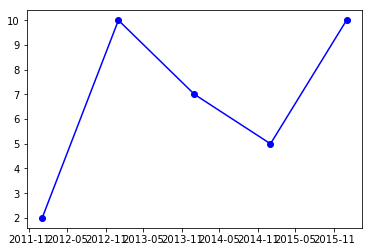

In [286]:
## Mood over time
  # - D15 = How am I today? - reversed
    
Mood = patient_results['D15']
timeline = patient_results['DateofForm']
x = timeline
y = (10 - Mood)
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)

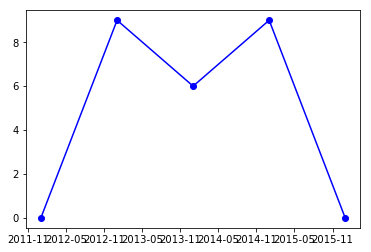

In [287]:
## Compared to this time two weeks ago I feel... 
  # - D16 = Compared to this time two weeks ago I feel - reversed
Changing_mood = patient_results['D16']
timeline = patient_results['DateofForm']
x = timeline
y = (10 - Changing_mood)
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)

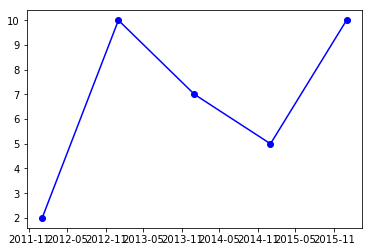

In [288]:
## Sleep over time
  # - D17 = Sleep - reversed
Sleep = patient_results['D15']
timeline = patient_results['DateofForm']
x = timeline
y = (10 - Sleep)
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)

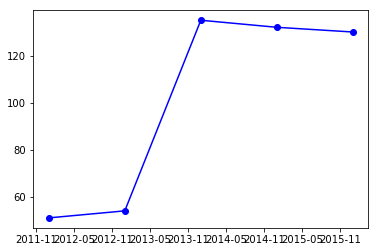

In [289]:
## Weight over time
 # - D18 = Weight
weight = patient_results['D18']
timeline = patient_results['DateofForm']

x = timeline
y = weight
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)

In [290]:
patient_results.describe()

,D3,D15,D16,D17,D18,D8.dd,D8.mm,D8.yyyy,D9.dd,D9.mm,...,D27e,D27f,D27g,D28a,D28b,D28c,D28d,D28e,D28f,D28g
count,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,...,5.000000,5.00000,5.0000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,47727.0,3.200000,5.200000,3.600000,100.400000,27.0,12.0,2017.0,6.0,6.0,...,6.600000,6.60000,5.0000,6.40000,4.000000,4.800000,3.400000,3.400000,6.600000,2.800000
std,0.0,3.420526,4.549725,3.847077,43.775564,0.0,0.0,0.0,0.0,0.0,...,3.507136,3.04959,4.1833,3.04959,3.464102,4.207137,2.607681,2.408319,3.435113,1.788854
min,47727.0,0.000000,1.000000,0.000000,51.000000,27.0,12.0,2017.0,6.0,6.0,...,1.000000,3.00000,1.0000,2.00000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
25%,47727.0,0.000000,1.000000,2.000000,54.000000,27.0,12.0,2017.0,6.0,6.0,...,6.000000,4.00000,2.0000,5.00000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000
50%,47727.0,3.000000,4.000000,2.000000,130.000000,27.0,12.0,2017.0,6.0,6.0,...,7.000000,7.00000,3.0000,7.00000,3.000000,6.000000,3.000000,4.000000,8.000000,3.000000
75%,47727.0,5.000000,10.000000,4.000000,132.000000,27.0,12.0,2017.0,6.0,6.0,...,9.000000,9.00000,9.0000,8.00000,6.000000,7.000000,5.000000,5.000000,9.000000,4.000000
max,47727.0,8.000000,10.000000,10.000000,135.000000,27.0,12.0,2017.0,6.0,6.0,...,10.000000,10.00000,10.0000,10.00000,9.000000,10.000000,7.000000,6.000000,10.000000,5.000000


In [291]:
## Calculating Mental Health assume all mental health categories are weighted equally
### Mental Health
#  - D20a = Depression
#  - D20b = Anxiety
#  - D20c = Enthusiasm - Reversed
#  - D20d = Mental Fatigue
patient_results['mentalHealth'] = (patient_results.D20a + patient_results.D20b + 
                                   (10 - patient_results.D20c) + patient_results.D20d)/4
patient_results.mentalHealth

C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      4.75
50     8.00
100    6.50
167    5.25
217    7.00
Name: mentalHealth, dtype: float64

In [292]:
## calculating saliva and swallowing assuming all categories are weighted equally
### Saliva and swallowing
#  - D21a  = Saliva
#  - D21b = Food variety - reversed
#  - D21c = Food texture - reversed
#  - D21d = Amount of food consumed - reversed
#  - D21e = Supplements
#  - D21f = Ability to swallow - reversed
patient_results['salivaSwallowing'] = (patient_results.D21a + (10 - patient_results.D21b) + 
                                       (10 - patient_results.D21c) + (10 - patient_results.D21d) + 
                                       patient_results.D21e + (10 - patient_results.D21f))/6


C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [293]:
## Calculating the breathing category assuming all categories are considered equal
### Breathing
#  - D22a = Overall Breathing - reversed
#  - D22b = Shortness of breath - reversed
#  - D22c = Breathing while lying flat - reversed

patient_results['breathing'] = ((10 - patient_results.D22a) + (10 - patient_results.D22b) + 
                                (10 - patient_results.D22c))/3


C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [294]:
## calculating appetite and digestive system assuming all categories are weighted equally
### Appetite and digestive health
#  - D23a = Appetite - reversed
#  - D23b = Nausea
#  - D23c = Bloating/Gas
#  - D23d = Constipation

patient_results['appetite'] = ((10 - patient_results.D23a) + patient_results.D23b + 
                               patient_results.D23c + patient_results.D23d) / 4

C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [295]:
## physical attributes assuming all are equal

''' Physical
  - Physical_Fatigue_LL
  - Wasting_LL
  - Twitching_LL
  - Cramping_LL  
  - Weakness_LL
  - Stiffness_LL
  - Pain_LL
  - Physical_Fatigue_RL
  - Wasting_RL
  - Twitching_RL
  - Cramping_RL
  - Weakness_RL
  - Stiffness_RL
  - Pain_RL
  - Physical_Fatigue_LA
  - Wasting_LA
  - Twitching_LA
  - Cramping_LA
  - Weakness_LA
  - Stiffness_LA
  - Pain_LA
  - Physical_Fatigue_RA
  - Wasting_RA
  - Twitching_RA
  - Cramping_RA
  - Weakness_RA
  - Stiffness_RA
  - Pain_RA
  - Physical_Fatigue_Torso
  - Wasting_Torso
  - Twitching_Torso 
  - Cramping_Torso 
  - Weakness_Torso
  - Stiffness_Torso
  - Pain_Torso
  '''
patient_results['Left_arm'] = (patient_results.D24a + patient_results.D24b + patient_results.D24c + 
                               patient_results.D24d + patient_results.D24e + patient_results.D24f +
                               patient_results.D24g)/7
patient_results['Right_arm'] = (patient_results.D25a + patient_results.D25b + patient_results.D25c + 
                               patient_results.D25d + patient_results.D25e + patient_results.D25f +
                               patient_results.D25g)/7
patient_results['Left_leg'] = (patient_results.D26a + patient_results.D26b + patient_results.D26c + 
                               patient_results.D26d + patient_results.D26e + patient_results.D26f +
                               patient_results.D26g)/7
patient_results['Right_leg'] = (patient_results.D27a + patient_results.D27b + patient_results.D27c + 
                               patient_results.D27d + patient_results.D27e + patient_results.D27f +
                               patient_results.D27g)/7
patient_results['Torso'] = (patient_results.D28a + patient_results.D28b + patient_results.D28c + 
                               patient_results.D28d + patient_results.D28e + patient_results.D28f +
                               patient_results.D28g)/7

patient_results['Physical_Total'] = (patient_results.Left_arm + patient_results.Right_arm + 
                                    patient_results.Left_leg + patient_results.Right_leg + 
                                    patient_results.Torso) / 5

C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

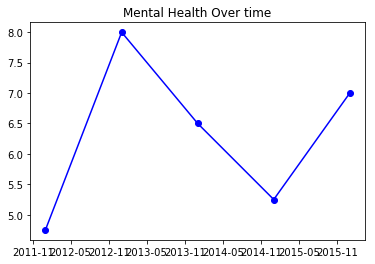

In [296]:
## Mental Health over time

mentalHealth = patient_results['mentalHealth']
timeline = patient_results['DateofForm']

x = timeline
y = mentalHealth
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Mental Health Over time')


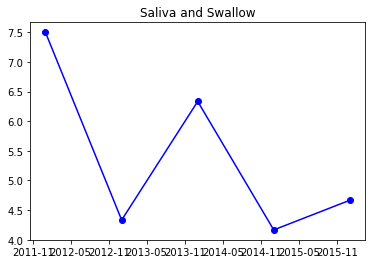

In [297]:
## Mental Health over time

salivaSwallowing = patient_results['salivaSwallowing']
timeline = patient_results['DateofForm']

x = timeline
y = salivaSwallowing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Saliva and Swallow')

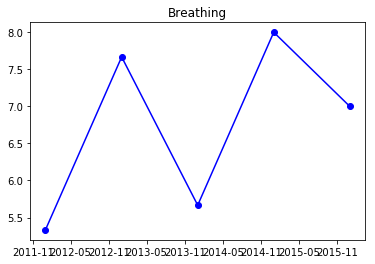

In [298]:
breathing = patient_results['breathing']
timeline = patient_results['DateofForm']

x = timeline
y = breathing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Breathing')

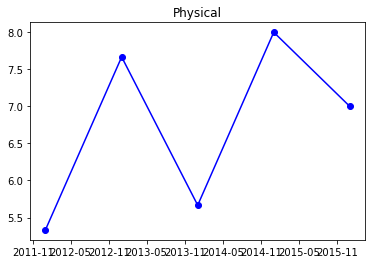

In [299]:
physical = patient_results['Physical_Total']
timeline = patient_results['DateofForm']

x = timeline
y = breathing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Physical')

In [300]:
#Calculating overall health assuming all categories are considered equal

patient_results['Overall_Health'] = (patient_results.mentalHealth + patient_results.salivaSwallowing + 
                                     patient_results.breathing + patient_results.appetite + patient_results.Physical_Total)/5

C:\Users\Katherinep\AppData\Local\conda\conda\envs\p2_Wrangle\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


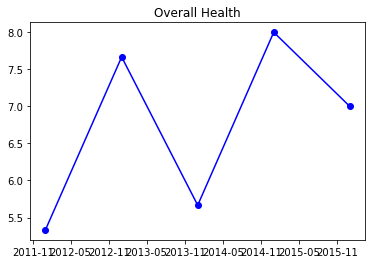

In [301]:
overall_health = patient_results['Overall_Health']
timeline = patient_results['DateofForm']

x = timeline
y = breathing
plt.plot(x, y, color='blue', marker='.',
     markerfacecolor='blue', markersize=12)
plt.title('Overall Health')

In [302]:
def get_info(patient, column):
    global sampleData
    minimum = 200
    maximum = 0
    mean = -1
    for index, row in sampleData.iterrows():
    # Choosing categorical variables to encode
        if row['D3']==patient:
            if minimum > row[column]:
                minimum = row[column]
            if maximum < row[column]:
                maximum = row[column]
            if mean == -1:
                mean = row[column]
                mean = (mean + row[column])/2
    return(minimum, maximum, mean)
       

        

In [303]:
patient_results.salivaSwallowing

0      7.500000
50     4.333333
100    6.333333
167    4.166667
217    4.666667
Name: salivaSwallowing, dtype: float64

In [304]:
# DEFINING LATEST INPUT AND LAST INPUT - NEEDS TO BE CHANGED TO FORM INPUT
today = patient_results[patient_results['DateofForm'] == '2016-01-01']
last_submission = patient_results[patient_results['DateofForm'] == '2015-01-01']
output_col = ['D18','mentalHealth', 'salivaSwallowing', 'breathing', 'appetite', 'Physical_Total']
for col in output_col:
    col_today = today[col]
    print(col_today)



217    130
Name: D18, dtype: int64
217    7.0
Name: mentalHealth, dtype: float64
217    4.666667
Name: salivaSwallowing, dtype: float64
217    7.0
Name: breathing, dtype: float64
217    7.0
Name: appetite, dtype: float64
217    5.171429
Name: Physical_Total, dtype: float64


In [310]:
output_col = ['D18','mentalHealth', 'salivaSwallowing', 'breathing', 'appetite', 'Physical_Total']
for col in output_col:
    col_today = today[col]
    col_last_sub = last_submission[col]
    change = float(col_today) / float(col_last_sub)
    if change >= 1.2:
        print('There has been a significant increase in ' + str(col) + ' results.')
    elif change <= 80:
        print('There has been a significant decrease in '+ str(col) +  ' results.')


There has been a significant decrease in D18 results.
There has been a significant increase in mentalHealth results.
There has been a significant decrease in salivaSwallowing results.
There has been a significant decrease in breathing results.
There has been a significant increase in appetite results.
There has been a significant decrease in Physical_Total results.
